In [1]:
from multiobject.pytorch import MultiObjectDataLoader, MultiObjectDataset
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import os

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Utils

In [2]:
def visualize_dataset(path_to_dataset):
    
    batch_size = 32
    dataset_path = path_to_dataset
    
    train_set = MultiObjectDataset(dataset_path, train=True, split = 1.)
    
    print("Num of Images ", len(train_set))
    
    train_loader = MultiObjectDataLoader(train_set, batch_size=batch_size, shuffle=True)
    
    samples, _ = iter(train_loader).next()
    fig=plt.figure(figsize=(12, 12))
    N_images = 21
    for i in range(1,N_images):
        fig.add_subplot(int(np.sqrt(N_images)) +1 , int(np.sqrt(N_images))+1, i)
        plt.imshow(np.transpose(samples[i], (1,2,0)))
    plt.show()
    
    return None

# dSprites base

Num of Images  100000


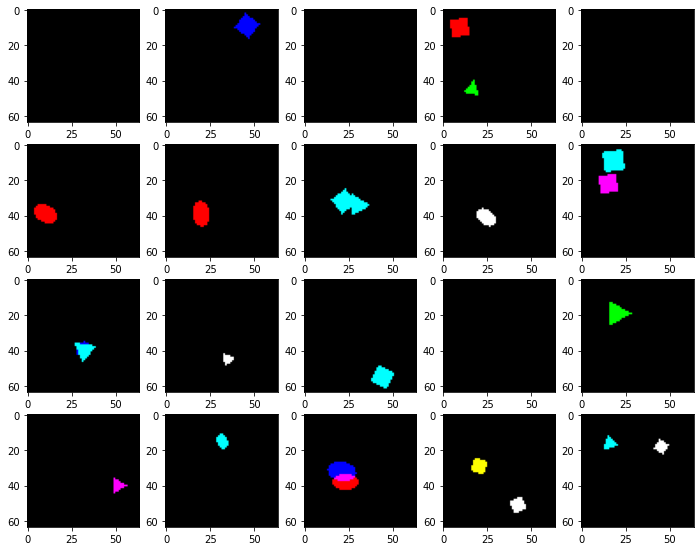

In [3]:
visualize_dataset('generated/dsprites/multi_dsprites_210407_144010.npz')

# Custom

## Test 1

Add customization of :
- output folder through --folder 
- file name through --file 
- number of images generated through -n

Num of Images  64


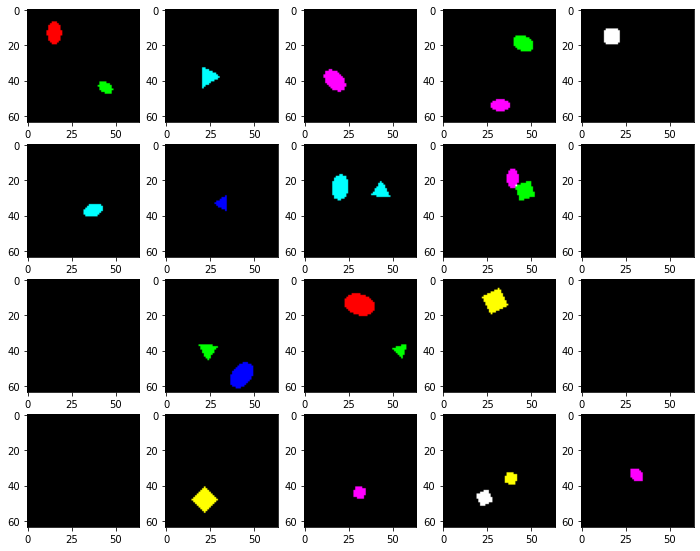

In [4]:
visualize_dataset('generated/custom/multi_dsprites_test_1.npz')

# Test 2

Add customization of :
- patch size through --patch_size 
- frame size through --frame_size
- allow overlap through --overlap

Parameters : patch_size = 64, frame_size = 128

Num of Images  64


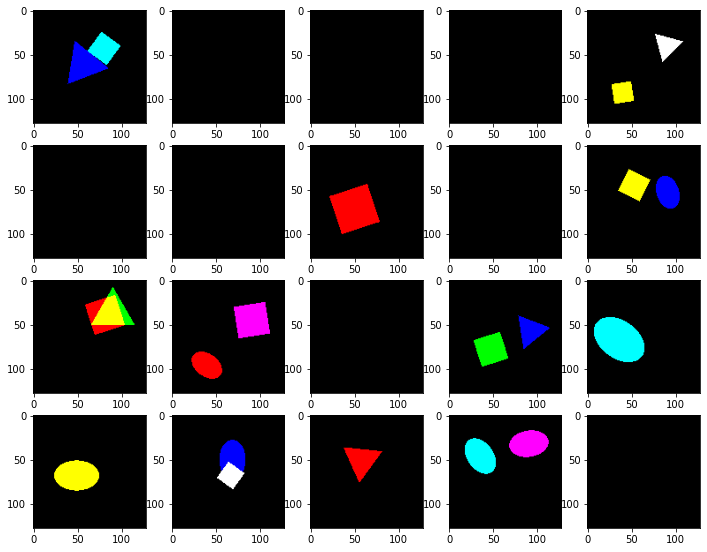

In [5]:
visualize_dataset('generated/custom/multi_dsprites_test_2.npz')

## Test 3

Add customization of :
- placement of objects through -p --placement ('random', 'center', 'xalign', 'yalign') 


Parameters : patch_size = 32, frame_size = 128, placement = yalign

Num of Images  64


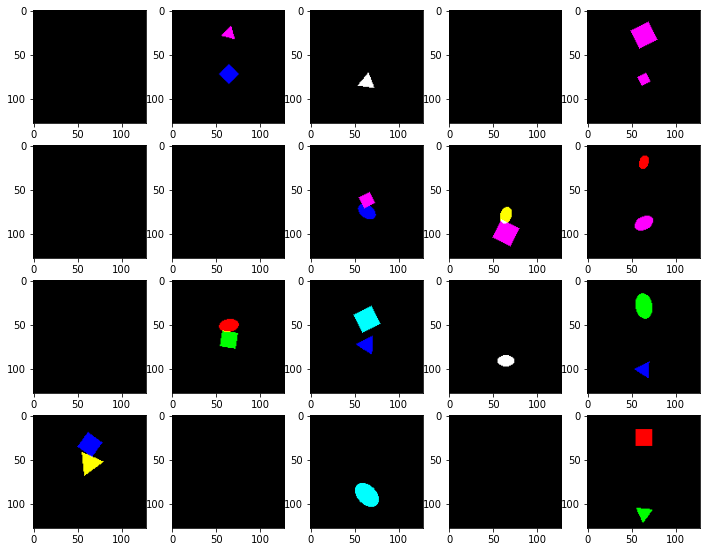

In [6]:
visualize_dataset('generated/custom/multi_dsprites_test_3.npz')

Parameters : patch_size = 32, frame_size = 128, placement = xalign

Num of Images  64


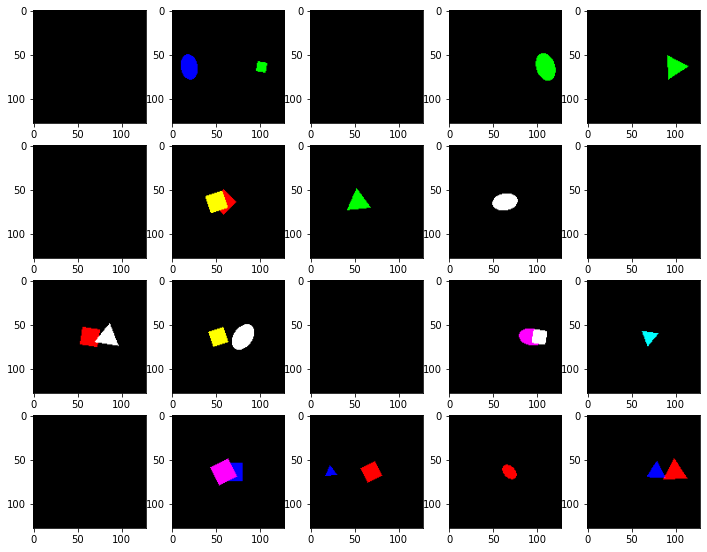

In [7]:
visualize_dataset('generated/custom/multi_dsprites_test_3_1.npz')

# generate_xyz (customization)

## Investigation of Existing One

In [6]:
from utils import graphics
from sprites import dsprites_binary_color as dsprites

In [7]:
res = dsprites.generate_dsprites(patch_size = 18, num_colors = 3, num_angles = 2, num_scales = 3)
print("Result type ", type(res))
print("Result length ", len(res))
print("First element of result type ", type(res[0]))
print("First element of result length ", len(res[0]))
print("Second element of result type ", type(res[1]))
print("Second element of result length ", len(res[1]))

Result type  <class 'tuple'>
Result length  2
First element of result type  <class 'list'>
First element of result length  54
Second element of result type  <class 'dict'>
Second element of result length  4


### First Element

In [8]:
elem = res[0][0] #All the same
print("Type ", type(elem))
print("Shape ", elem.shape)

Type  <class 'numpy.ndarray'>
Shape  (18, 18, 3)


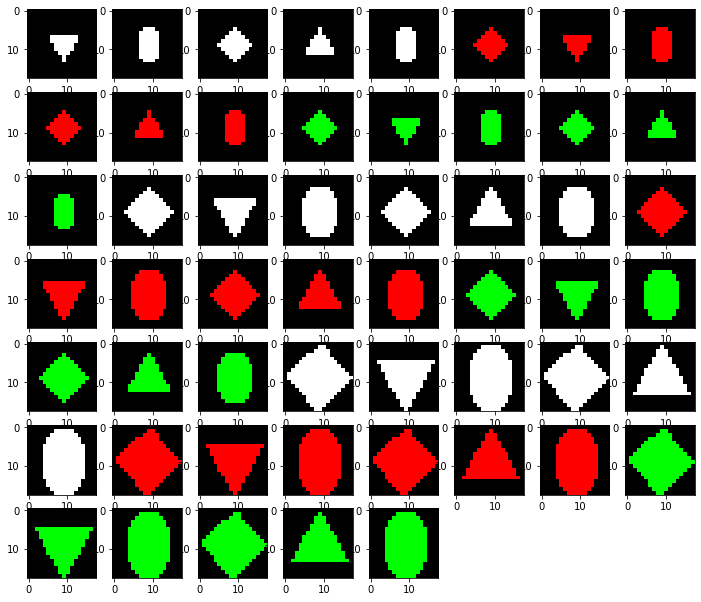

In [9]:
fig=plt.figure(figsize=(12, 12))
N_images = len(res[0])
for i in range(1,N_images):
    fig.add_subplot(int(np.sqrt(N_images)) +1 , int(np.sqrt(N_images))+1, i)
    plt.imshow(res[0][i])
plt.show()

### Second Element

In [10]:
print("Shape ", len(res[1]['shape']))
print("Angle ", len(res[1]['angle']))
print("Color ", len(res[1]['color']))
print("Scale ", len(res[1]['scale']))

Shape  54
Angle  54
Color  54
Scale  54


In [11]:
print("Shape ", res[1]['shape'])
print()
print("Angle ", res[1]['angle'])
print()
print("Color ", res[1]['color'])
print()
print("Scale ", res[1]['scale'])

Shape  [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]

Angle  [0.0, 0.0, 0.0, 3.141592653589793, 3.141592653589793, 3.141592653589793, 0.0, 0.0, 0.0, 3.141592653589793, 3.141592653589793, 3.141592653589793, 0.0, 0.0, 0.0, 3.141592653589793, 3.141592653589793, 3.141592653589793, 0.0, 0.0, 0.0, 3.141592653589793, 3.141592653589793, 3.141592653589793, 0.0, 0.0, 0.0, 3.141592653589793, 3.141592653589793, 3.141592653589793, 0.0, 0.0, 0.0, 3.141592653589793, 3.141592653589793, 3.141592653589793, 0.0, 0.0, 0.0, 3.141592653589793, 3.141592653589793, 3.141592653589793, 0.0, 0.0, 0.0, 3.141592653589793, 3.141592653589793, 3.141592653589793, 0.0, 0.0, 0.0, 3.141592653589793, 3.141592653589793, 3.141592653589793]

Color  [array([255, 255, 255]), array([255, 255, 255]), array([255, 255, 255]), array([255, 255, 255]), array([255, 255, 255]), array([255, 255, 255]), array([255,   0,   0

## Customization

In [12]:
print("In fact, it is not usefull to customize this one hehe ... ")
print("The one we need to customize is generate_multiobject_dataset")

In fact, it is not usefull to customize this one hehe ... 
The one we need to customize is generate_multiobject_dataset


# generate_multiobject_dataset (customization)

In [13]:
import tqdm.notebook as tqdm
from multiobject import generate_multiobject_dataset

## Investigation

In [14]:
frame_size = (64,64)
sprites, labels = dsprites.generate_dsprites(patch_size = 18, num_colors = 3, num_angles = 2, num_scales = 3)
ch = sprites[0].shape[-1]
count_distrib = {0: 1/3, 1: 1/3, 2: 1/3}
allow_overlap = True
img_shape = (*frame_size, ch)
print("ch ", ch)
print("img shape ", img_shape)

ch  3
img shape  (64, 64, 3)


In [15]:
dataset, n_obj, labels = generate_multiobject_dataset(n = 12, 
                                                      shape = img_shape, 
                                                      sprites = sprites, 
                                                      sprites_attr = labels, 
                                                      count_distrib=count_distrib,
                                                      allow_overlap=allow_overlap)

100%|████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 1993.65it/s]

num sprites: 54
counts: {0: 4, 1: 4, 2: 4}


In [16]:
print("dataset type ", type(dataset))
print("n_obj type ", type(n_obj))
print("labels type ", type(labels))
print("dataset shape ", dataset.shape)
print("n_obj shape ", n_obj.shape)

dataset type  <class 'numpy.ndarray'>
n_obj type  <class 'numpy.ndarray'>
labels type  <class 'dict'>
dataset shape  (12, 64, 64, 3)
n_obj shape  (12,)


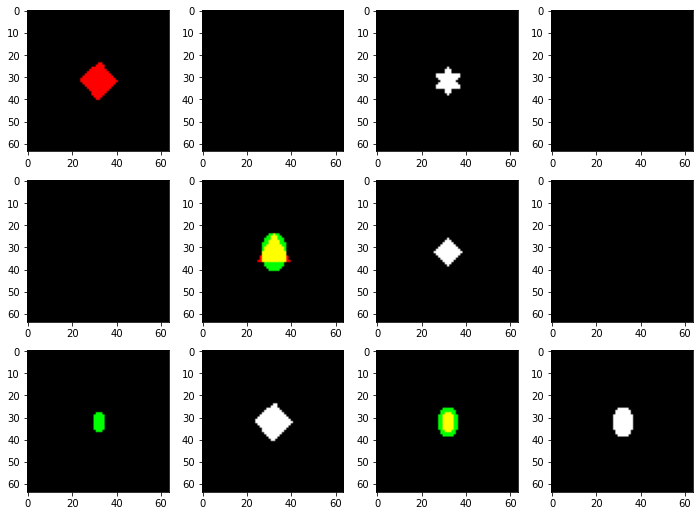

In [17]:
fig=plt.figure(figsize=(12, 12))
N_images = dataset.shape[0]
for i in range(1,N_images+1):
    fig.add_subplot(int(np.sqrt(N_images)) +1 , int(np.sqrt(N_images))+1, i)
    plt.imshow(dataset[i-1])
plt.show()

In [18]:
n_obj

array([1, 0, 2, 0, 0, 2, 1, 0, 1, 2, 2, 1])

In [19]:
print("labels shape ", labels['shape'])
print()
print("labels angle ", labels['angle'])
print()
print("labels color ", labels['color'])
print()
print("labels scale ", labels['scale'])

labels shape  [array([0]), array([], dtype=float64), array([1, 1]), array([], dtype=float64), array([], dtype=float64), array([2, 1]), array([0]), array([], dtype=float64), array([2]), array([2, 0]), array([2, 2]), array([2])]

labels angle  [array([0.]), array([], dtype=float64), array([0.        , 3.14159265]), array([], dtype=float64), array([], dtype=float64), array([0.        , 3.14159265]), array([3.14159265]), array([], dtype=float64), array([3.14159265]), array([3.14159265, 3.14159265]), array([3.14159265, 3.14159265]), array([0.])]

labels color  [array([[255,   0,   0]]), array([], dtype=float64), array([[255, 255, 255],
       [255, 255, 255]]), array([], dtype=float64), array([], dtype=float64), array([[  0, 255,   0],
       [255,   0,   0]]), array([[255, 255, 255]]), array([], dtype=float64), array([[  0, 255,   0]]), array([[255, 255, 255],
       [255, 255, 255]]), array([[255,   0,   0],
       [  0, 255,   0]]), array([[255, 255, 255]])]

labels scale  [array([1.]), 